# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Creating Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

# bir sinüs datası oluşturdum. sonuçta sinüs datası birbirini tekrar edecek
# bunun için linspace ile 0 ile 50 arasında 501 tane sayı oluşturdum.
# y değerleri de bunların sin() değerleri oldu.

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

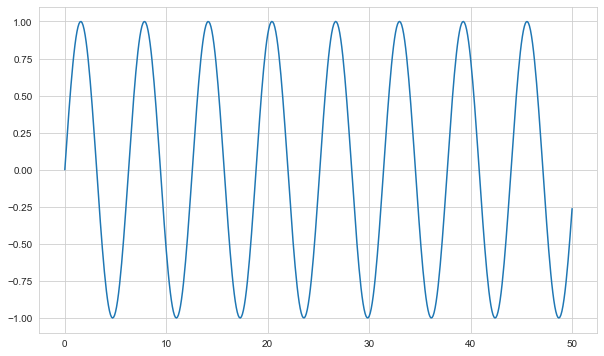

In [5]:
plt.plot(x,y)

# görüldüğü gibi bir sonraki bir öncekiyle ilişkili olan anlamlı bir veri oluştu.

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

# datası sinüs değelerinden oluşan bir dataframe oluşturduk.

In [7]:
df

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[501 rows x 1 columns]

## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

In [9]:
test_percent = 0.15
# datanın % 15 ini test için ayırmak istiyorum.

In [10]:
len(df)*test_percent

# test datamın uzunluğu 75

75.14999999999999

In [12]:
test_point = np.round(len(df)*test_percent)

test_point

75.0

In [14]:
test_ind = int(len(df) - test_point)

In [15]:
test_ind

# indeksi 426 sonrası olan data test datam olacak. 426 dan öncesi train datam olacak

426

In [16]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

# train ve test olarak datamı bölmüş oldum.

In [17]:
train

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
42.100 -0.952
42.200 -0.978
42.300 -0.994
42.400 -1.000
42.500 -0.996

[426 rows x 1 columns]

In [18]:
test

Sine
42.600 -0.982
42.700 -0.959
42.800 -0.925
42.900 -0.883
43.000 -0.832
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[75 rows x 1 columns]

### Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler,

# verilerimi 0 ile 1 arasında topluycam. minmaxscaler kullanacağım.

In [22]:
scaler = MinMaxScaler()

In [23]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [40]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps) 2 datadan 3.sünü tahmin edecek
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size)

# x trainim de y trainim de aynı yerde (tahmin edeceğim (target) ve train edeceğim datam aynı yerde) 
# o yüzden data ile targets parametreleri aynı (train_scaled)

In [38]:
len(train_scaled)

426

In [41]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

# train_scaled 426 satırdı fakat generator bana 424 adet data üretmiş. 
# çünkü benim sequence uzunluğum (lenght parametresi) 2. 
# eğitim yaparken kaydırmayı 2 adımda yaptığı için 2 değer kayıp oldu.(batch_size ?????)
# (örneğin ilk başta 0-1 indeks arasındaki datayı alıp 3. indeksi tahmin etti. sonra 2-3 indeksler arasını alıp 5. indeksi tahmin etti)

424

In [31]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [32]:
# What does the first batch look like?
X, y = generator[0]

In [33]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


In [34]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [35]:
gen = pd.DataFrame(generator, columns = ["X", "y"])

In [42]:
gen.head()

# x --> birinci ve ikinci featureları ile y target ını tahmin ediyor

X                       y
0  [[[0.4999991159163256], [0.5499162248393211]]]  [[0.5993345785103605]]
1  [[[0.5499162248393211], [0.5993345785103605]]]  [[0.6477604050750987]]
2  [[[0.5993345785103605], [0.6477604050750987]]]  [[0.6947098496819506]]
3  [[[0.6477604050750987], [0.6947098496819506]]]  [[0.7397138089998276]]
4  [[[0.6947098496819506], [0.7397138089998276]]]   [[0.782322618343557]]

<AxesSubplot:>

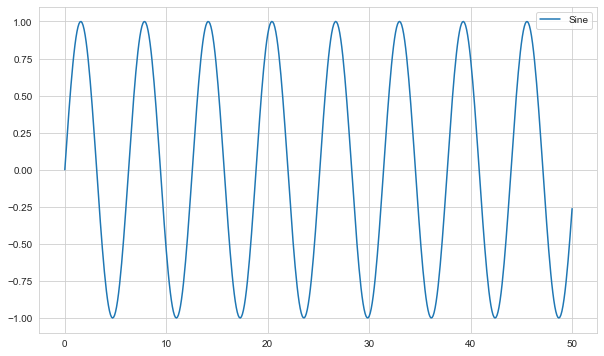

In [43]:
df.plot()

The more length the more training time

In [44]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

# length = 64 --> 64 satırı alıp sonrakinin tahmin etmeye çalışacak.

In [45]:
# What does the first batch look like?
X, y = generator[0]

In [46]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [48]:
# We're only using one feature in our time series
n_features = 1

In [50]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 64, activation = "tanh", input_shape=(length, n_features)))  
# işlemi uzatmamak için nöron sayısını lenght sayısı olan 64 olarak belirledim. 128 de yapabilirdim.
# input_shape içine satır sayısı sütun sayısı gibi girdim.

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

In [51]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4224 adet parametre oluşmuş.
# 64 tane inputumuz var. bunlardan 64 tane nörondan oluşan hidden layer a parametreler geliyor. (64 x 64)
# 1 tane Dense unit var. fully connected. burdan geriye geri besleme olacak.
# her nöronda birer bias değeri var
# Bunları çarpınca 4224 parametre yapıyor
# (64*64) + (64 + 64) = 4224

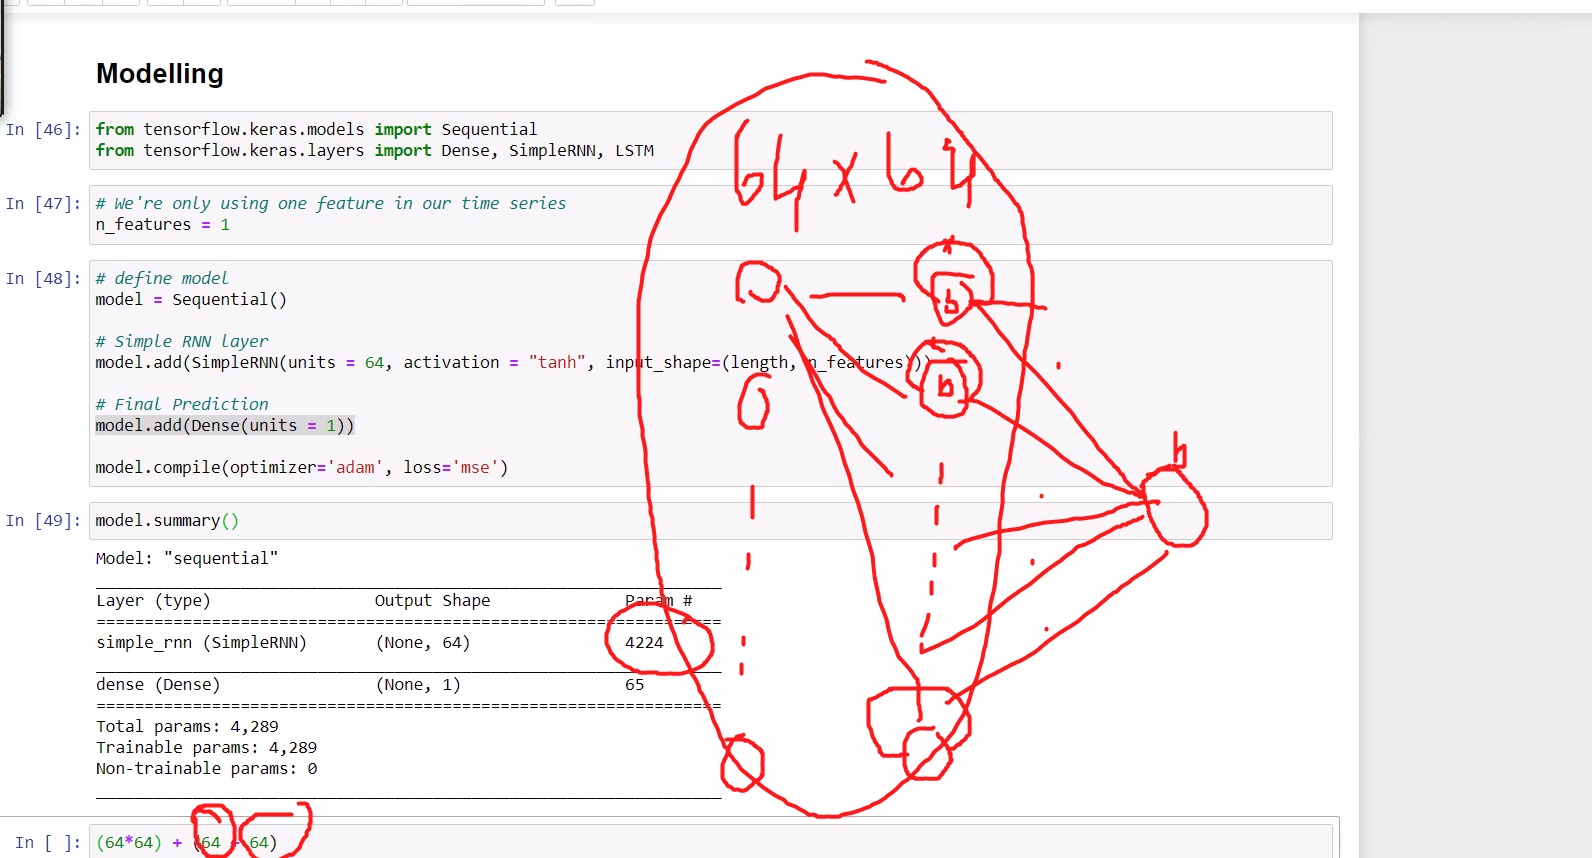

In [52]:
(64*64) + (64 + 64)

4224

In [53]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 4s 8ms/step - loss: 0.0068
Epoch 2/5
362/362 [==============================] - 3s 8ms/step - loss: 8.3980e-05
Epoch 3/5
362/362 [==============================] - 3s 7ms/step - loss: 1.7654e-04
Epoch 4/5
362/362 [==============================] - 3s 7ms/step - loss: 1.7126e-04
Epoch 5/5
362/362 [==============================] - 3s 7ms/step - loss: 5.5141e-06


<AxesSubplot:>

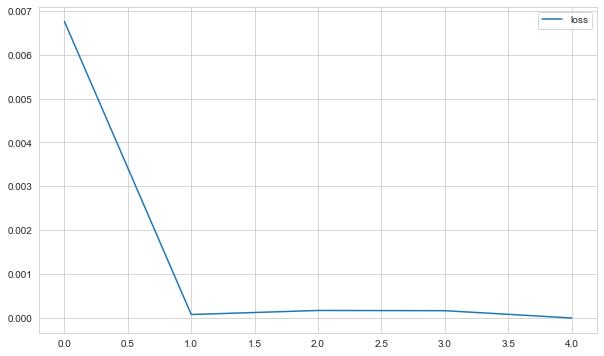

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [55]:
first_eval_batch = train_scaled[-length:]

# train setimin son sequence ini yani son 64'ü veriyorum. (yani 362 satır veriyorum)

In [56]:
first_eval_batch.shape

(64, 1)

In [58]:
generator[0][0].shape

# generator'um bana 64 e 1 bir data üretmişti.

(1, 64, 1)

In [59]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

# son batch i aldım ve bunu reshape yaparak modelimin benden beklediği moda getirdim.

In [60]:
first_eval_batch.shape

(1, 64, 1)

In [61]:
model.predict(first_eval_batch)

# 64 veri ile yapılan ilk tahmini 0.00855426 çıktı

array([[0.00855426]], dtype=float32)

In [62]:
test_scaled[0]

# ilk test değerim 0.00885189. 
# tahmin ettiğim değer buna çok yakın.

array([0.00885189])

In [67]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [68]:
current_batch.shape

(1, 64, 1)

In [66]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [69]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1) 

# 0.0085  benim ilk predict (tahmin) değerimdi.

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [75]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))  

for i in range(len(test)):   # bu döngü ile her defasında alttan bir değeri iptal edip yerine yeni datayı ekleyecek. 
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]  # current batch ten aldığım tek predict i aldım.
    
    # store prediction
    test_predictions.append(current_pred) # o tek predict'i başta boş liste olan test_prediction a ekledim.
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)
    
    # yukarda 3 boyutlu array de bize kaç boyutlu eleman olduğunu gösteriyor.
    # bizim datamızın olduğu yer current_batch[:, 1:, :] deki ortadaki bölüm (1: olan bölüm)
    

In [76]:
test_predictions

[array([0.00855426], dtype=float32),
 array([0.02003824], dtype=float32),
 array([0.03625688], dtype=float32),
 array([0.05700334], dtype=float32),
 array([0.08202021], dtype=float32),
 array([0.11117475], dtype=float32),
 array([0.14433111], dtype=float32),
 array([0.1811352], dtype=float32),
 array([0.22136913], dtype=float32),
 array([0.2647683], dtype=float32),
 array([0.31107897], dtype=float32),
 array([0.35994288], dtype=float32),
 array([0.4110059], dtype=float32),
 array([0.46386933], dtype=float32),
 array([0.518063], dtype=float32),
 array([0.57300377], dtype=float32),
 array([0.62813085], dtype=float32),
 array([0.68280905], dtype=float32),
 array([0.73628867], dtype=float32),
 array([0.7878733], dtype=float32),
 array([0.83681124], dtype=float32),
 array([0.8824501], dtype=float32),
 array([0.9240668], dtype=float32),
 array([0.9611087], dtype=float32),
 array([0.9930831], dtype=float32),
 array([1.0196228], dtype=float32),
 array([1.0404255], dtype=float32),
 array([1.055

In [77]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [78]:
true_predictions = scaler.inverse_transform(test_predictions)

In [79]:
true_predictions

array([[-0.98288183],
       [-0.95991405],
       [-0.92747704],
       [-0.88598445],
       [-0.83595111],
       [-0.77764248],
       [-0.7113303 ],
       [-0.6377227 ],
       [-0.55725549],
       [-0.47045785],
       [-0.37783727],
       [-0.28011022],
       [-0.17798498],
       [-0.07225899],
       [ 0.0361275 ],
       [ 0.14600813],
       [ 0.25626142],
       [ 0.36561694],
       [ 0.47257531],
       [ 0.5757438 ],
       [ 0.67361885],
       [ 0.76489584],
       [ 0.84812853],
       [ 0.92221174],
       [ 0.98616009],
       [ 1.03923903],
       [ 1.08084417],
       [ 1.11054374],
       [ 1.12829433],
       [ 1.13407689],
       [ 1.12810956],
       [ 1.11058999],
       [ 1.08191371],
       [ 1.04263123],
       [ 0.99331676],
       [ 0.93455886],
       [ 0.86694532],
       [ 0.79125685],
       [ 0.70828726],
       [ 0.61869182],
       [ 0.52316923],
       [ 0.42258422],
       [ 0.31776278],
       [ 0.20955786],
       [ 0.09883859],
       [-0

In [80]:
test

Sine
42.600 -0.982
42.700 -0.959
42.800 -0.925
42.900 -0.883
43.000 -0.832
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[75 rows x 1 columns]

In [81]:
test['Predictions'] = true_predictions

In [82]:
test

Sine  Predictions
42.600 -0.982       -0.983
42.700 -0.959       -0.960
42.800 -0.925       -0.927
42.900 -0.883       -0.886
43.000 -0.832       -0.836
...       ...          ...
49.600 -0.617       -0.678
49.700 -0.536       -0.577
49.800 -0.449       -0.470
49.900 -0.357       -0.357
50.000 -0.262       -0.240

[75 rows x 2 columns]

<AxesSubplot:>

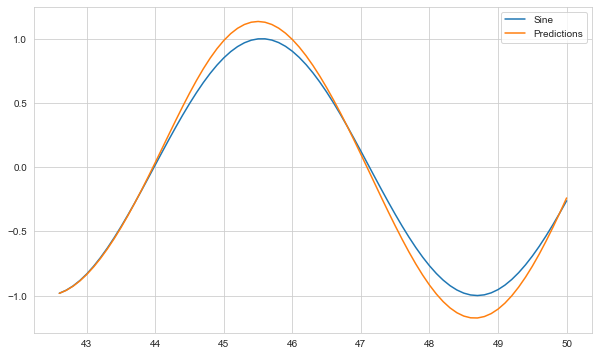

In [83]:
test.plot()

## Early Stopping and Validation Generator

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [91]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)
# hem dataya hem target a train datamı verdim. 
# generator 'u oluştururken içinde length ve batch_size parametrelerini de koyuyorum. 
# generate ederken batch olarak edeceği için aşağıda model.fit_generator() yaparken batch değeri girmeyeceğim.

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)
# test datamı da modelimin kabul edeceği aynı şekile sokuyorum.

In [88]:
len(validation_generator)

# train datamızda 75 datamız vardı. 75-64 = 11 tanesi validation'a ayrılmış oldu.
# dolayısıyla length'e vereceğimiz değer testten kısa olmalı ki validation için data kalsın

11

## LSTM

In [89]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 64, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [90]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 7s 15ms/step - loss: 0.0141 - val_loss: 3.4577e-05
Epoch 2/20
362/362 [==============================] - 5s 14ms/step - loss: 4.0155e-04 - val_loss: 9.4735e-05
Epoch 3/20
362/362 [==============================] - 5s 15ms/step - loss: 1.4150e-04 - val_loss: 1.6737e-05
Epoch 4/20
362/362 [==============================] - 5s 14ms/step - loss: 1.9721e-04 - val_loss: 2.8267e-05
Epoch 5/20
362/362 [==============================] - 5s 15ms/step - loss: 7.9521e-05 - val_loss: 4.3770e-05


<AxesSubplot:>

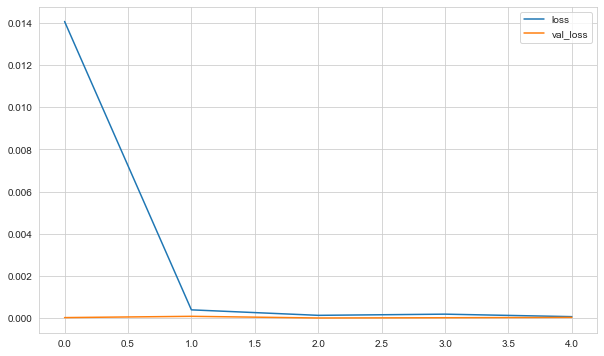

In [92]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [93]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [94]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test

Sine  Predictions  LSTM Predictions
42.600 -0.982       -0.983            -0.963
42.700 -0.959       -0.960            -0.937
42.800 -0.925       -0.927            -0.902
42.900 -0.883       -0.886            -0.858
43.000 -0.832       -0.836            -0.806
...       ...          ...               ...
49.600 -0.617       -0.678            -0.506
49.700 -0.536       -0.577            -0.429
49.800 -0.449       -0.470            -0.348
49.900 -0.357       -0.357            -0.264
50.000 -0.262       -0.240            -0.177

[75 rows x 3 columns]

<AxesSubplot:>

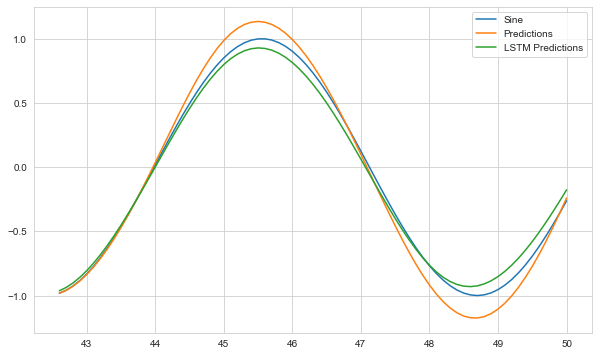

In [95]:
test.plot()

## Retrain and Forecasting

In [98]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [100]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [101]:
model = Sequential()
model.add(LSTM(64, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)  # yukarda generator un ürettiği tüm datayı kullandık.

Epoch 1/6
437/437 [==============================] - 7s 14ms/step - loss: 0.0103
Epoch 2/6
437/437 [==============================] - 6s 14ms/step - loss: 1.5373e-04
Epoch 3/6
437/437 [==============================] - 6s 14ms/step - loss: 1.8575e-04
Epoch 4/6
437/437 [==============================] - 6s 14ms/step - loss: 5.2801e-05
Epoch 5/6
437/437 [==============================] - 6s 14ms/step - loss: 1.8272e-04
Epoch 6/6
437/437 [==============================] - 6s 14ms/step - loss: 2.9516e-05


In [103]:
# datamın son 64 lük batch ini alıp  ileriye doğru forecast yapacağım. 

forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features)) 
# burdaki current_batch ilk oluşturacağım 64lük seri.

for i in range(64):  # bir saykıl yapmak için 64 olarak belirledim.
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [105]:
forecast = scaler.inverse_transform(forecast)

In [106]:
forecast

array([[-1.33852859e+00],
       [-1.13841540e+00],
       [-9.36276050e-01],
       [-7.34026670e-01],
       [-5.33665296e-01],
       [-3.37243487e-01],
       [-1.46838791e-01],
       [ 3.54831694e-02],
       [ 2.07705404e-01],
       [ 3.67902236e-01],
       [ 5.14274351e-01],
       [ 6.45186938e-01],
       [ 7.59201402e-01],
       [ 8.55101114e-01],
       [ 9.31910479e-01],
       [ 9.88899234e-01],
       [ 1.02559126e+00],
       [ 1.04175388e+00],
       [ 1.03738755e+00],
       [ 1.01271019e+00],
       [ 9.68141177e-01],
       [ 9.04278448e-01],
       [ 8.21883263e-01],
       [ 7.21865652e-01],
       [ 6.05265102e-01],
       [ 4.73244364e-01],
       [ 3.27077286e-01],
       [ 1.68143336e-01],
       [-2.07740598e-03],
       [-1.82010927e-01],
       [-3.69994999e-01],
       [-5.64282518e-01],
       [-7.63053427e-01],
       [-9.64421865e-01],
       [-1.16644880e+00],
       [-1.36715755e+00],
       [-1.56454804e+00],
       [-1.75661794e+00],
       [-1.9

In [107]:
df

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[501 rows x 1 columns]

In [108]:
len(forecast)

64

In [109]:
64*0.1

6.4

In [110]:
forecast_index = np.arange(50.1, 56.5, step = 0.1)

# df'imin son değeri 50 olduğu için forecast ile bunu devam ettirirken 50.1 den başladım. 
# 64 datadan oluşan bir batch'in 10'da birini bu değere ekleyip 0.1 step ile değerler ürettim.   
# dolayısıyla yeni forecast_index im yine 64 elemandan oluştu.

In [111]:
len(forecast_index)

64

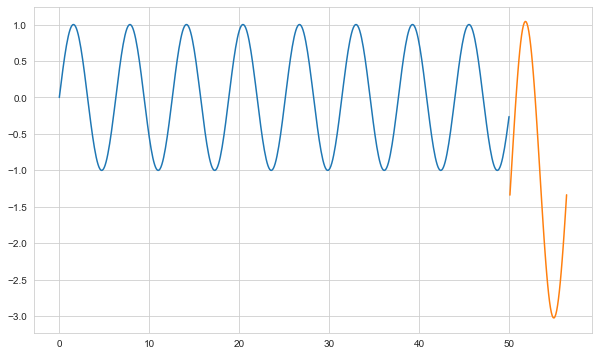

In [112]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)